# Import

In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 128kB/s 
     |████████████████████████████████| 6.8MB 36.2MB/s 
     |████████████████████████████████| 983kB 35.8MB/s 
     |████████████████████████████████| 266kB 35.6MB/s 
     |████████████████████████████████| 1.9MB 26.1MB/s 
     |████████████████████████████████| 1.2MB 33.8MB/s 
     |████████████████████████████████| 471kB 33.9MB/s 
     |████████████████████████████████| 3.3MB 36.4MB/s 
     |████████████████████████████████| 901kB 33.8MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.2-cp37-none-any.whl size=25277794 sha256=a6dab3e83b19a1ec6a72f28836d74026751f0afcaff0a4bb41f74c5c5b66891a
  Stored in directory: /root/.cache/pip/wheels/67/2e/f1/c72afa08df8b2d984b910dea228902ce81dae4511afe9fafd2
  Created wheel for langdetect: filename=langdetect-1.0.8-cp37-none-any.whl size=993193 sha256=b028aa016b01cba865c937fa3f38a1ea1a852e7266e690bac1b19974aca41c90
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import ktrain
from ktrain import text

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, hamming_loss


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Capstone - Multi Label Classification on Research Articles/datasets/train_cleaned.csv')
#train = pd.read_csv('./datasets/train_cleaned.csv')

# Model

In [ ]:
X = train['merged'].values.tolist()
classes = ['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']
y = train[classes].values.tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
train_data, test_data, preprocess = text.texts_from_array(x_train=X_train,
                                                          y_train=y_train,
                                                          x_test=X_test,
                                                          y_test=y_test,
                                                          class_names=classes,                                                                                                        
                                                          maxlen=128,                                                
                                                          preprocess_mode='bert',
                                                          random_state=42,
                                                          verbose=1,
                                                          )

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? True
preprocessing test...
language: en


task: text classification


In [ ]:
bert_model = text.text_classifier(name='bert',
                                    train_data=train_data,
                                    preproc=preprocess,
                                    metrics=['accuracy']
                                    )
    
learner = ktrain.get_learner(model=bert_model,
                             train_data=train_data,
                             val_data=test_data,
                            )
    


Is Multi-Label? True
maxlen is 128
done.


In [ ]:
bert_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 128)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 128)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 128, 768), ( 23440896    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 128, 768)     1536        Input-Segment[0][0]              
____________________________________________________________________________________________

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
525/525 [==============================] - 406s 720ms/step - loss: 0.7731 - accuracy: 0.2427
Epoch 2/1024
525/525 [==============================] - 377s 718ms/step - loss: 0.2350 - accuracy: 0.7250
Epoch 3/1024
525/525 [==============================] - 210s 399ms/step - loss: 0.8692 - accuracy: 0.2913


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


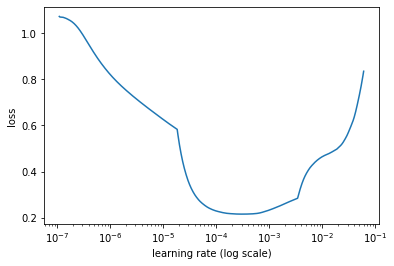

In [ ]:
learner.lr_find()
learner.lr_plot()

In [ ]:
# previously tested that convergence was achieved on 2nd epoch
history = learner.autofit(5e-5, 3)



begin training using triangular learning rate policy with max lr of 5e-05...
Epoch 1/3
525/525 [==============================] - 444s 797ms/step - loss: 0.2476 - accuracy: 0.7149 - val_loss: 0.1747 - val_accuracy: 0.7480
Epoch 2/3
525/525 [==============================] - 407s 775ms/step - loss: 0.1599 - accuracy: 0.7829 - val_loss: 0.1711 - val_accuracy: 0.7578
Epoch 3/3
525/525 [==============================] - 407s 776ms/step - loss: 0.1315 - accuracy: 0.8007 - val_loss: 0.1737 - val_accuracy: 0.7576


In [ ]:
predictor = ktrain.get_predictor(learner.model, preprocess)

In [ ]:
filepath='/content/drive/MyDrive/Capstone - Multi Label Classification on Research Articles/models/BERT'
predictor.save(filepath)

In [ ]:
# load saved model to skip training
filepath='/content/drive/MyDrive/Capstone - Multi Label Classification on Research Articles/models/BERT'
predictor = ktrain.load_predictor(filepath)

In [ ]:
# code snippet adapted from 'https://github.com/adam0ling/twitter_sentiment'

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='train acc')
    plt.plot(x, val_acc, 'r', label='val acc')
    plt.title('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='train loss')
    plt.plot(x, val_loss, 'r', label='val loss')
    plt.title('Loss')
    plt.legend()

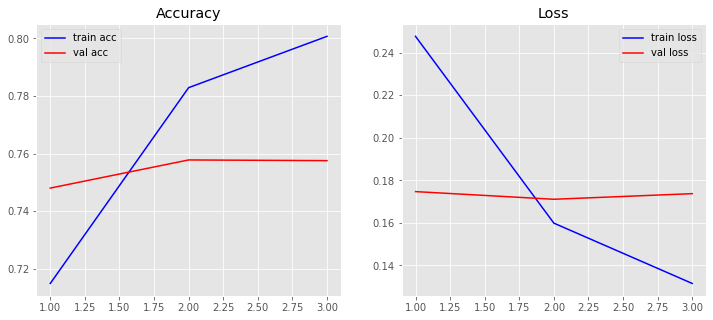

In [ ]:
plot_history(history)

In [ ]:
y_pred = predictor.predict(X_test)

In [ ]:
%%timeit -r1 -n1
y_pred = predictor.predict(X_test)

1 loop, best of 1: 34.2 s per loop


In [ ]:
y_pred[:3]

[[('Computer Science', 0.86120415),
  ('Physics', 0.0020078258),
  ('Mathematics', 0.0036138697),
  ('Statistics', 0.570531),
  ('Quantitative Biology', 0.0012283443),
  ('Quantitative Finance', 0.0006192119)],
 [('Computer Science', 0.6022946),
  ('Physics', 0.16405368),
  ('Mathematics', 0.42447272),
  ('Statistics', 0.5197158),
  ('Quantitative Biology', 0.01024806),
  ('Quantitative Finance', 0.004447706)],
 [('Computer Science', 0.98921984),
  ('Physics', 0.0018219237),
  ('Mathematics', 0.027862836),
  ('Statistics', 0.058322422),
  ('Quantitative Biology', 0.0006229506),
  ('Quantitative Finance', 0.0006489559)]]

In [ ]:
# extract probability from each tuple and round off to get prediction as integer
temp = []
for row in y_pred:
    arr = []
    for tup in row:
      arr.append(tup[1])
    temp.append(arr) 

y_pred = np.array(temp).round().astype(int)

In [ ]:
print(classification_report(y_test, y_pred, target_names=classes, digits=3))
print('hamming loss : {} \n'.format(hamming_loss(y_test, y_pred)))

                      precision    recall  f1-score   support

    Computer Science      0.808     0.875     0.840      1692
             Physics      0.906     0.877     0.891      1226
         Mathematics      0.861     0.775     0.816      1150
          Statistics      0.787     0.750     0.768      1069
Quantitative Biology      0.614     0.352     0.448       122
Quantitative Finance      0.868     0.733     0.795        45

           micro avg      0.835     0.815     0.825      5304
           macro avg      0.808     0.727     0.760      5304
        weighted avg      0.834     0.815     0.823      5304
         samples avg      0.858     0.852     0.837      5304

hamming loss : 0.07290425109257052 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
